In [139]:
%matplotlib inline
import pandas as pd

In [140]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,24K,2009
1,The Miracle Rider,1935
2,Faust,1960
3,Soul of the Avenger,1997
4,Otoko wa tsurai yo: Boukyou hen,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [35]:
counts = pd.value_counts(titles.title, ascending=False)
counts.head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Three Musketeers    12
The Outsider            12
Maya                    11
Temptation              11
Freedom                 11
Kismet                  11
Othello                 11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [38]:
counts = pd.value_counts(titles.year.where(titles.year//10==193), ascending=False)
counts.head(3)

1937.0    1193
1936.0    1137
1938.0    1127
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

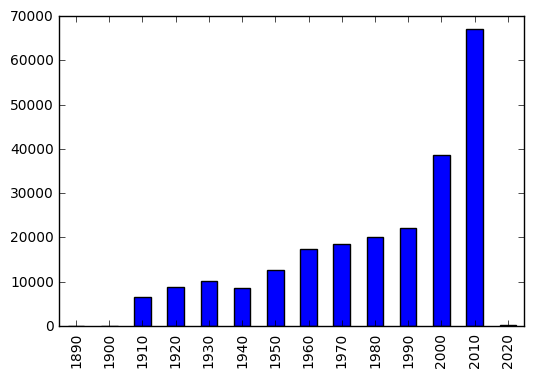

In [85]:
movies_per_decade = pd.value_counts((titles.year//10) * 10)
movies_per_decade.sort_index(inplace=True)


movies_per_decade.plot('bar')   

### Plot the number of "Hamlet" films made each decade.

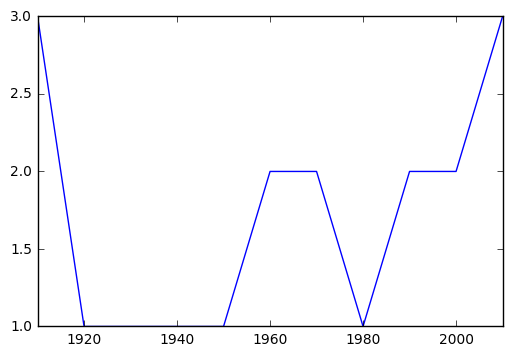

In [87]:
hamlet_movies_per_decade = pd.value_counts((titles.where(titles.title=='Hamlet').year//10) * 10)
hamlet_movies_per_decade.sort_index(inplace=True)


hamlet_movies_per_decade.plot('line') 

In [93]:
0

0

In [92]:
0

0

### Plot the number of "Rustler" characters in each decade of the history of film.

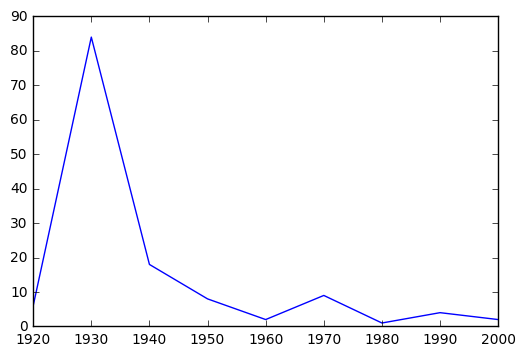

In [94]:
rustler_characters_per_decade = pd.value_counts((cast.where(cast.character=='Rustler').year//10) * 10)
rustler_characters_per_decade.sort_index(inplace=True)


rustler_characters_per_decade.plot('line') 

### Plot the number of "Hamlet" characters each decade.

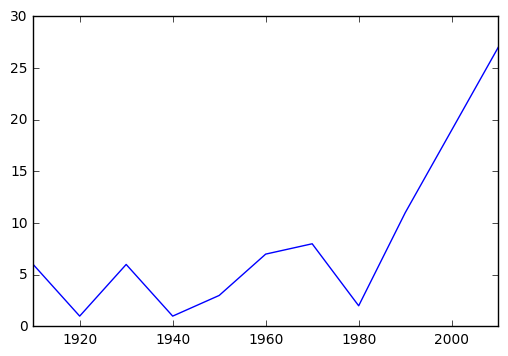

In [95]:
rustler_characters_per_decade = pd.value_counts((cast.where(cast.character=='Hamlet').year//10) * 10)
rustler_characters_per_decade.sort_index(inplace=True)


rustler_characters_per_decade.plot('line') 

### What are the 11 most common character names in movie history?

In [98]:
 pd.value_counts(cast.character).head(11)

Himself        19535
Dancer         11979
Extra          10869
Reporter        8117
Doctor          7410
Student         7139
Policeman       6836
Party Guest     6714
Nurse           6630
Bartender       6582
Minor Role      6213
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [100]:
pd.value_counts(cast.where(cast.character=='Herself').name).head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Hillary Clinton        6
Joan Rivers            6
Bunny Yeager           5
Rekha                  5
Marilyn Monroe         5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [101]:
pd.value_counts(cast.where(cast.character=='Himself').name).head(10)

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            38
John F. Kennedy          33
George W. Bush           23
Winston Churchill        23
Ron Jeremy               23
Benito Mussolini         22
Franklin D. Roosevelt    20
Martin Luther King       20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [156]:
actor = cast[(cast.year==1945) & (cast.type=='actor')].groupby(['name', 'type']).size().sort_values(ascending=False).head(1)
actress = cast[(cast.year==1945) & (cast.type=='actress')].groupby(['name', 'type']).size().sort_values(ascending=False).head(1)
pd.concat([actor, actress])

name          type   
Emmett Vogan  actor      39
Bess Flowers  actress    29
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [157]:
actor = cast[(cast.year==1985) & (cast.type=='actor')].groupby(['name', 'type']).size().sort_values(ascending=False).head(1)
actress = cast[(cast.year==1985) & (cast.type=='actress')].groupby(['name', 'type']).size().sort_values(ascending=False).head(1)
pd.concat([actor, actress])

name           type   
Shakti Kapoor  actor      21
Sukumari       actress    19
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [159]:
cast[cast.name=="Mammootty"].groupby('year').size()

year
1971     1
1980     2
1981     3
1982     7
1983    18
1984    16
1985    21
1986    18
1987     9
1988     7
1989    10
1990    15
1991     6
1992     3
1993     5
1994     5
1995     5
1996     3
1997     2
1998     4
1999     4
2000     7
2001     3
2002     3
2003     2
2004     8
2005     6
2006     8
2007     7
2008     9
2009    12
2010     9
2011     7
2012     7
2013     5
2014     6
2015     6
2016     3
dtype: int64

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [161]:
cast[cast.character.str.startswith('Patron in')].groupby('character').size().sort_values(ascending=False).head(10)

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [162]:
cast[cast.character.str.startswith('Science')].groupby('character').size().sort_values(ascending=False).head(10)

character
Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Kid              6
Science Club Member      5
Science Promo Cadet      5
Science Reporter         5
Science                  4
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

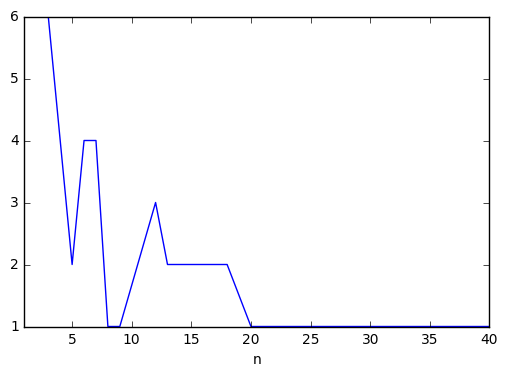

In [172]:
judi_roles = cast[cast.name=='Judi Dench'].groupby('n').size()
judi_roles.plot('line')

### Plot the n-values of Cary Grant's roles through his career.

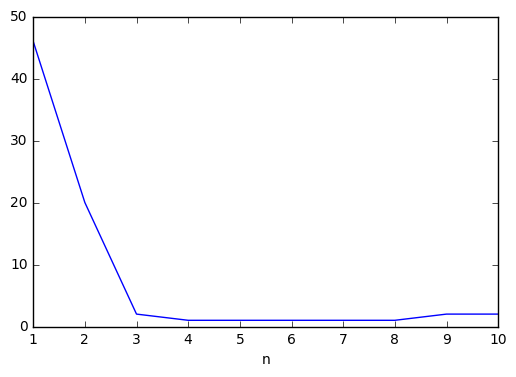

In [173]:
cary_roles = cast[cast.name=='Cary Grant'].groupby('n').size()
cary_roles.plot('line')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

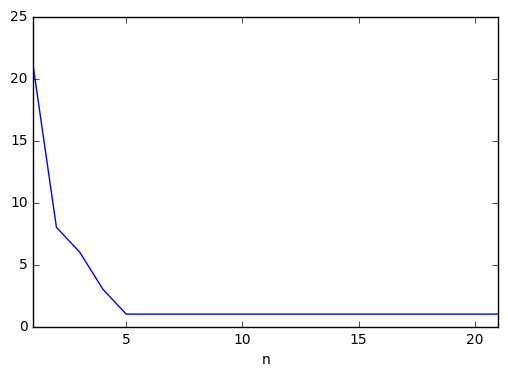

In [174]:
sidney_roles = cast[cast.name=='Sidney Poitier'].groupby('n').size()
sidney_roles.plot('line')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [175]:
cast[cast.n==1].groupby('type').size()

type
actor      101533
actress     45291
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [176]:
cast[cast.n==2].groupby('type').size()

type
actor      74382
actress    62931
dtype: int64